In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

train_data_dir = 'C:\\Users\\siddu\\Desktop\\training'
validation_data_dir = 'C:\\Users\\siddu\\Desktop\\validation'

img_width, img_height = 64, 64
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 681 images belonging to 2 classes.


Found 681 images belonging to 2 classes.


In [4]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))  
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = classifier.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

c:\Users\siddu\Desktop\Alt\Alt\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


c:\Users\siddu\Desktop\Alt\Alt\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5426 - loss: 0.6792 - val_accuracy: 0.7321 - val_loss: 0.5193
Epoch 2/25
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8125 - loss: 0.4613

C:\Users\siddu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4613 - val_accuracy: 0.5556 - val_loss: 0.6961
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 641ms/step - accuracy: 0.8255 - loss: 0.4122 - val_accuracy: 0.7292 - val_loss: 0.5746
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7188 - loss: 0.6119 - val_accuracy: 0.5556 - val_loss: 0.7158
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 674ms/step - accuracy: 0.8364 - loss: 0.3771 - val_accuracy: 0.8601 - val_loss: 0.3534
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.3566 - val_accuracy: 0.6667 - val_loss: 0.4810
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - accuracy: 0.8298 - loss: 0.3729 - val_accuracy: 0.9018 - val_loss: 0.2567
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 0.2978 - val_accuracy: 1.0000 - val_loss: 0.0878
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 615ms/step - accuracy: 0.8890 - loss: 0.2882 - val_accuracy: 0.8646 - val_lo

In [5]:
score = classifier.evaluate(validation_generator, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.1591871976852417
Validation accuracy: 0.9251101613044739


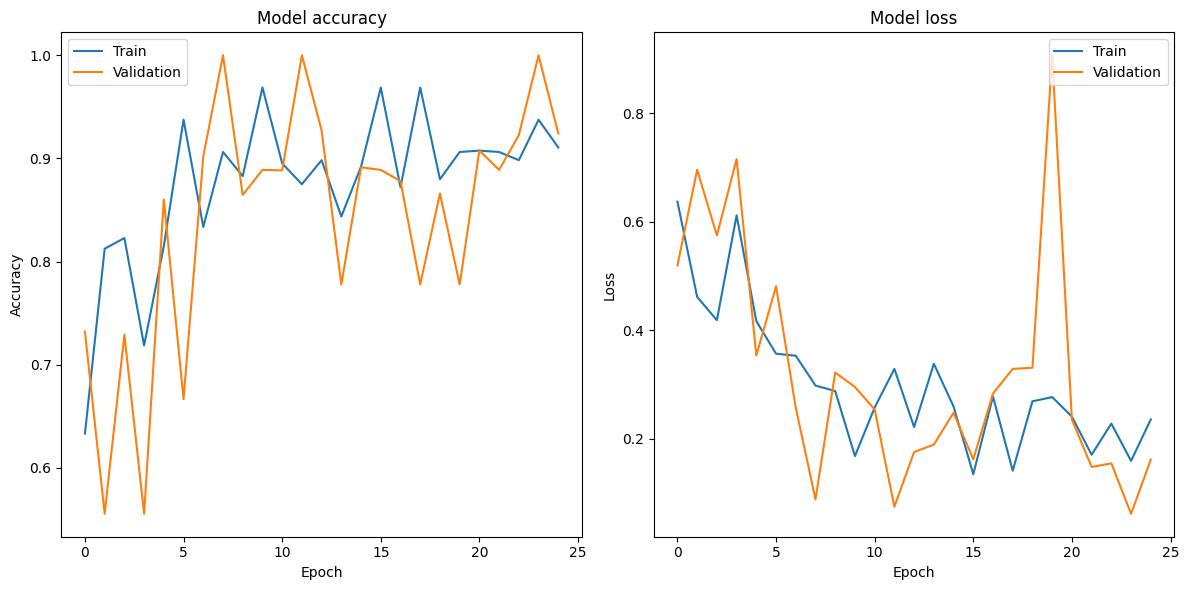

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()